In [1]:
import pandas as pd
from pycaret.classification import *
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Cargar y explorar la data
df = pd.read_csv('caso2_microcredito_default.csv')


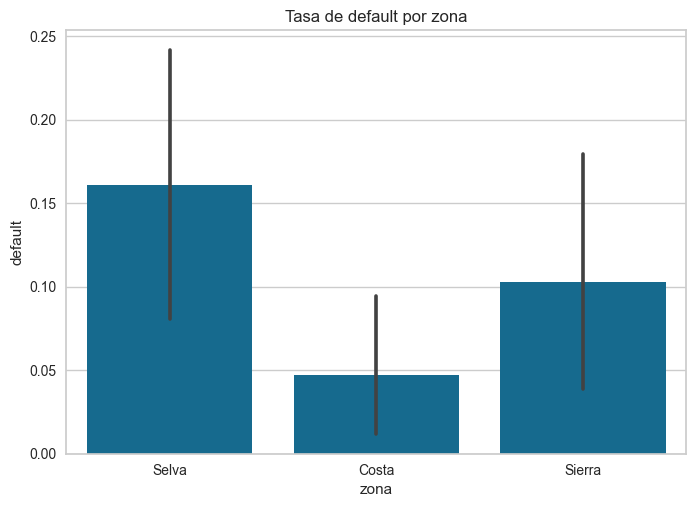

0.104


In [2]:

# 2. Análisis exploratorio NO trivial: identificar patrones por zona
sns.barplot(x='zona', y='default', data=df)
plt.title("Tasa de default por zona")
plt.show()
print(df['default'].mean())

In [3]:

# 3. Segmentar por negocios donde el default es mayor
df_seg = df[df['tipo_negocio'].isin(['Agrícola', 'Comercio'])]

In [4]:
df_seg['default'].mean()

0.09027777777777778

In [5]:
from imblearn.combine import SMOTEENN

exp = setup(data=df_seg,
            target='default',
            session_id=999,
            categorical_features=['zona', 'tipo_negocio'],
            ignore_features=['cuotas_pagadas'],
            remove_multicollinearity=True,
            multicollinearity_threshold=0.8,
            normalize=True,
            fix_imbalance=True,
            fix_imbalance_method=SMOTEENN())


,Description,Value
0,Session id,999
1,Target,default
2,Target type,Binary
3,Original data shape,"(144, 7)"
4,Transformed data shape,"(92, 8)"
5,Transformed train set shape,"(52, 8)"
6,Transformed test set shape,"(44, 8)"
7,Ignore features,1
8,Numeric features,3
9,Categorical features,2


In [6]:

# 5. Buscar el mejor modelo considerando AUC y Recall
best = compare_models(sort='Recall')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.6200,0.5778,0.6000,0.1150,0.1924,0.0769,0.1507,0.0250
svm,SVM - Linear Kernel,0.6900,0.5444,0.5000,0.2083,0.2638,0.1675,0.1903,0.0320
lr,Logistic Regression,0.7200,0.5000,0.4000,0.1000,0.1586,0.0597,0.0992,0.7780
knn,K Neighbors Classifier,0.6500,0.5111,0.4000,0.0917,0.1471,0.0310,0.0744,0.6290
ada,Ada Boost Classifier,0.7100,0.5500,0.4000,0.1176,0.1750,0.0752,0.1066,0.0430
et,Extra Trees Classifier,0.8300,0.6611,0.4000,0.1533,0.2167,0.1620,0.1954,0.0550
nb,Naive Bayes,0.7700,0.5167,0.3000,0.0833,0.1300,0.0653,0.0941,0.0270
dt,Decision Tree Classifier,0.6900,0.4778,0.3000,0.0783,0.1233,0.0021,0.0209,0.0420
ridge,Ridge Classifier,0.6600,0.4556,0.3000,0.0700,0.1119,-0.0167,0.0065,0.0290
lightgbm,Light Gradient Boosting Machine,0.6000,0.4333,0.3000,0.0300,0.0545,-0.0302,-0.0383,0.0760


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [15]:

# 6. Evaluación de sensibilidad para reducir falsos negativos
# final_model = tune_model(best, optimize='Recall')
# plot_model(final_model, plot='confusion_matrix')
# plot_model(final_model, plot='feature')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.4000,1.0000,1.0000,0.1429,0.2500,0.0909,0.2182
2,0.8000,0.8889,0.0000,0.0000,0.0000,-0.1111,-0.1111
3,0.9000,1.0000,1.0000,0.5000,0.6667,0.6154,0.6667
4,0.9000,0.8889,1.0000,0.5000,0.6667,0.6154,0.6667
5,0.9000,0.3333,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9000,1.0000,1.0000,0.5000,0.6667,0.6154,0.6667
7,0.9000,0.5556,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.8000,0.6667,0.0000,0.0000,0.0000,-0.1111,-0.1111


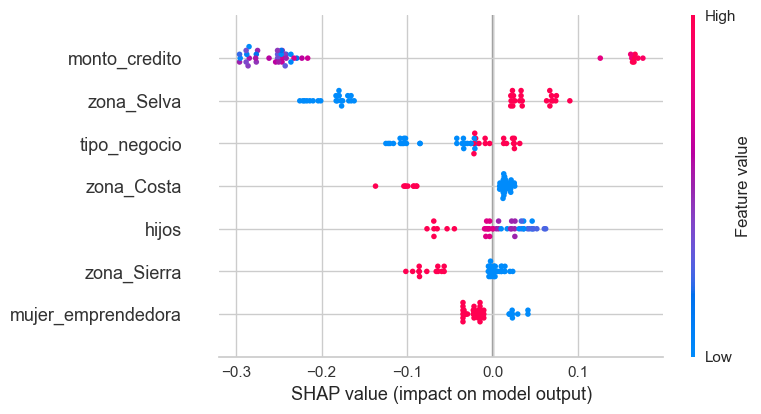

In [13]:
from pycaret.classification import create_model

final_model = create_model('rf')  # o 'lightgbm', etc.
interpret_model(final_model, plot='summary')


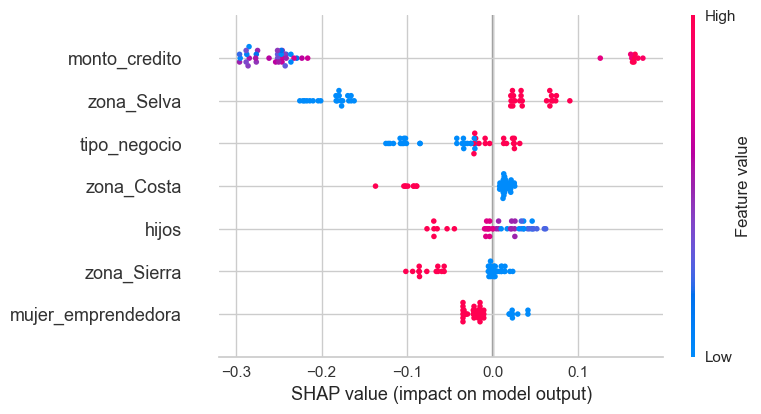

    zona tipo_negocio  monto_credito  mujer_emprendedora  hijos  \
0  Selva     Agrícola           4500                   1      3   

   prediction_label  prediction_score  
0                 1              0.72  


In [14]:

# 7. Interpretación por zona
interpret_model(final_model, plot='summary')

# 8. Simular nuevo crédito (no usar todo el df)
nuevo_cliente = pd.DataFrame({
    'zona': ['Selva'],
    'tipo_negocio': ['Agrícola'],
    'monto_credito': [4500],
    'mujer_emprendedora': [1],
    'hijos': [3]
})
pred = predict_model(final_model, data=nuevo_cliente)
print(pred)


In [ ]:
import pandas as pd
from pycaret.classification import *
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Cargar y explorar la data
df = pd.read_csv('caso2_microcredito_default.csv')


In [ ]:

# 9. Guardar para pipeline rural
save_model(final_model, 'modelo_default_rural_selva')